In [1]:
%load_ext autoreload
%autoreload 2
from confignb import *

X, y, pts, ks, masks = util.load_data()

In [ ]:
gs = []

for depth in [5, 10, 15, 20]:
    rf = RFC(max_depth=depth, min_samples_leaf=10, random_state=SEED, n_jobs=-1)

    results = cv(SEED, rf, X, y, pts, ks, verbose=False)
    logging.info(f"[depth={depth}]: {results['atk_score_mean'].mean():.4f}")

    gs.append(util.results_to_dict(results, depth=depth))
    util.save_results(gs, 'rf_depth')

17:38:50: [depth=5]: -0.0007
17:42:24: [depth=10]: 0.0013
17:47:01: [depth=15]: 0.0018
17:52:40: [depth=20]: 0.0012


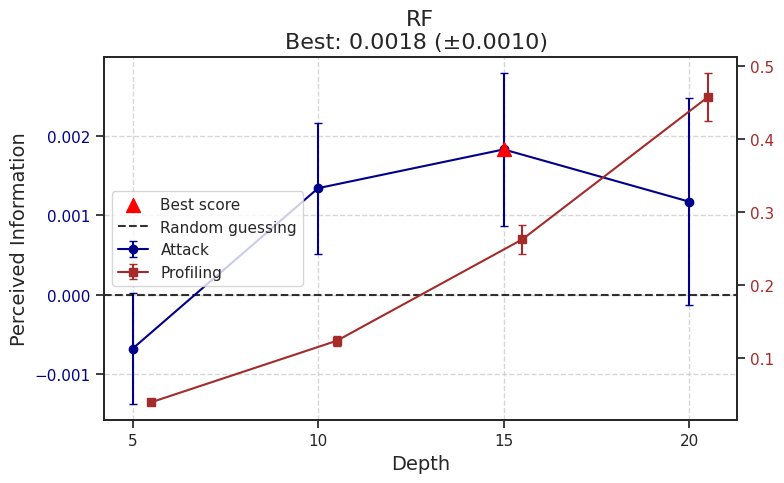

In [2]:
fig, ax = plt.subplots(figsize=(8, 5))
plots.plot_gs_results(
    'rf_depth', "RF (n_estimators=100)", ax=ax, key='depth', xlab='Depth', loc='upper left'
)
plots.savetight(fig, '04_rf_depth')

In [3]:
gs = []

for min_samples_leaf in [100, 200, 500, 1000]:
    rf = RFC(n_estimators=100, max_depth=15, min_samples_leaf=min_samples_leaf, random_state=SEED, n_jobs=-1)
    results = cv(SEED, rf, X, y, pts, ks, verbose=True)
    logging.info(f"[min_samples_leaf={min_samples_leaf}]: {results['atk_score_mean'].mean():.4f}")

    gs.append(util.results_to_dict(results, min_samples_leaf=min_samples_leaf))
    util.save_results(gs, 'rf_min_samples_leaf')

17:55:13: FOLD 1: PROF=0.6811; ATK=0.0062
17:55:40: FOLD 2: PROF=0.6667; ATK=-0.0032
17:56:06: FOLD 3: PROF=0.6531; ATK=0.0030
17:56:33: FOLD 4: PROF=0.6951; ATK=-0.0004
17:56:58: FOLD 5: PROF=0.6436; ATK=0.0041
17:57:24: FOLD 6: PROF=0.6083; ATK=0.0011
17:57:48: FOLD 7: PROF=0.6550; ATK=0.0020
17:58:13: FOLD 8: PROF=0.6283; ATK=0.0006
17:58:36: FOLD 9: PROF=0.6800; ATK=0.0030
17:59:00: FOLD 10: PROF=0.6480; ATK=0.0013
[Parallel(n_jobs=1)]: Done 10 out of 10 | elapsed:  4.2min finished
17:59:00: [min_samples_leaf=100]: 0.0018
17:59:26: FOLD 1: PROF=0.5612; ATK=0.0093
17:59:49: FOLD 2: PROF=0.5596; ATK=0.0008
18:00:13: FOLD 3: PROF=0.5411; ATK=0.0035
18:00:35: FOLD 4: PROF=0.5736; ATK=0.0024
18:00:57: FOLD 5: PROF=0.5202; ATK=0.0038
18:01:19: FOLD 6: PROF=0.5167; ATK=0.0041
18:01:40: FOLD 7: PROF=0.5321; ATK=0.0027
18:02:02: FOLD 8: PROF=0.5457; ATK=0.0018
18:02:23: FOLD 9: PROF=0.5664; ATK=0.0035
18:02:44: FOLD 10: PROF=0.5232; ATK=0.0025
[Parallel(n_jobs=1)]: Done 10 out of 10 | elaps

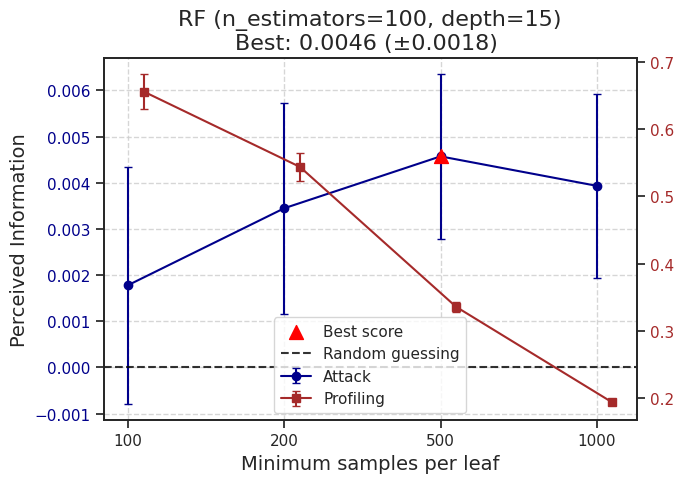

In [8]:
fig, ax = plt.subplots(figsize=(7, 5))
plots.plot_gs_results(
    'rf_min_samples_leaf', "RF (n_estimators=100, depth=15)", loc='lower center',
    ax=ax, key='min_samples_leaf', xlab='Minimum samples per leaf',
)
plots.savetight(fig, '04_rf_min_samples_leaf')

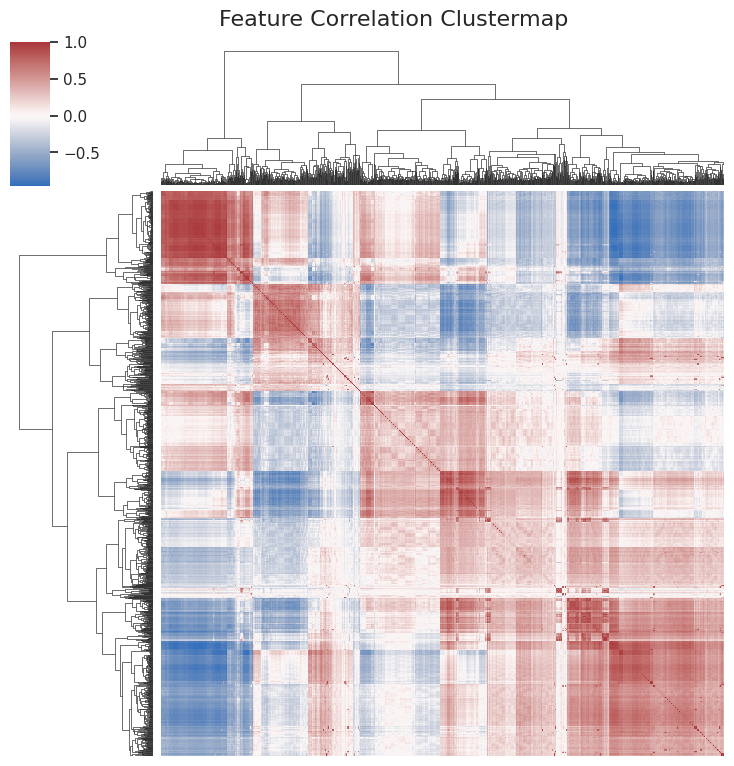

In [12]:
C = np.corrcoef(X, rowvar=False)
g = sns.clustermap(C, figsize=(8, 8), cmap='vlag', center=0)
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xticklabels([])
g.ax_heatmap.set_yticklabels([])
g.figure.suptitle('Feature Correlation Clustermap', y=1.02, fontsize=16)
plots.savetight(g.figure, '04_feature_clustermap')

In [2]:
gs = []

for n_clust in [1400, 1350, 1300, 1250, 1200]:
    clusterer = util.ClusterFeatures(n_clusters=n_clust)
    pl = make_pipeline(clusterer, simplerf(SEED, n_estimators=100, depth=15))

    results = cv(SEED, pl, X, y, pts, ks, verbose=True)
    logging.info(f"[n_clusters={n_clust}]: {results['atk_score_mean'].mean():.4f}")

    gs.append(
        util.results_to_dict(results, n_clusters=n_clust)
    )
    util.save_results(gs, 'rf_depth_cluster')

18:35:01: Clustering features...
18:35:03: Clustering complete (took 1.23 seconds), created 1400 clusters.
18:35:19: FOLD 1: PROF=0.3420; ATK=0.0081
18:35:19: Clustering features...
18:35:21: Clustering complete (took 1.57 seconds), created 1400 clusters.
18:35:36: FOLD 2: PROF=0.3416; ATK=0.0034
18:35:36: Clustering features...
18:35:38: Clustering complete (took 1.92 seconds), created 1400 clusters.
18:35:53: FOLD 3: PROF=0.3443; ATK=0.0042
18:35:53: Clustering features...
18:35:55: Clustering complete (took 1.88 seconds), created 1400 clusters.
18:36:10: FOLD 4: PROF=0.3386; ATK=0.0032
18:36:10: Clustering features...
18:36:12: Clustering complete (took 1.34 seconds), created 1400 clusters.
18:36:28: FOLD 5: PROF=0.3295; ATK=0.0059
18:36:28: Clustering features...
18:36:31: Clustering complete (took 2.30 seconds), created 1400 clusters.
18:36:46: FOLD 6: PROF=0.3266; ATK=0.0048
18:36:46: Clustering features...
18:36:47: Clustering complete (took 1.33 seconds), created 1400 clusters.

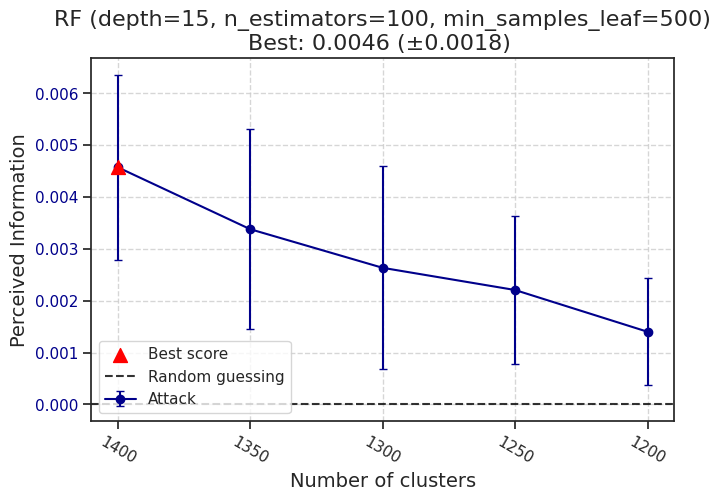

In [12]:
fig, ax = plt.subplots(figsize=(7, 5))

plots.plot_gs_results('rf_depth_cluster',
    f"RF (depth=15, n_estimators=100, min_samples_leaf=500)", xlab='Number of clusters',
    ax=ax, key='n_clusters', plot_prof=False, loc='lower left',
)
plots.ticklabsp(ax, 'x', rot=-30)
plots.savetight(fig, '04_rf_depth')

In [17]:
gs = []

for nest in [100, 200, 300, 500]:
    pl = simplerf(SEED, n_estimators=nest)

    results = cv(SEED, pl, X, y, pts, ks, verbose=False)
    logging.info(f"[n_estimators={nest}]: {results['atk_score_mean'].mean():.4f}")

    gs.append(util.results_to_dict(results, n_estimators=nest))
    util.save_results(gs, 'rf_n_est')

21:25:41: [n_estimators=100]: 0.0046
21:31:58: [n_estimators=200]: 0.0064
21:41:07: [n_estimators=300]: 0.0069
21:56:49: [n_estimators=500]: 0.0073


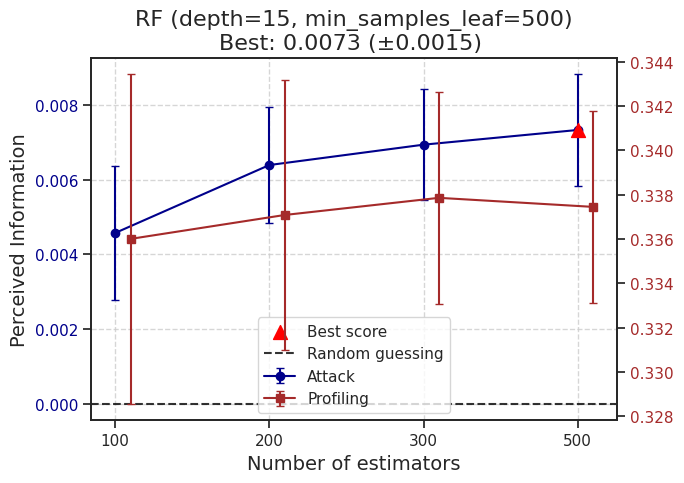

In [18]:
fig, ax = plt.subplots(figsize=(7, 5))
plots.plot_gs_results(
    'rf_n_est', "RF (depth=15, min_samples_leaf=500)", loc='lower center',
    ax=ax, key='n_estimators', xlab='Number of estimators',
)
plots.savetight(fig, '04_rf_n_est')

In [19]:
gs = []

for n in [25, 50, 100, 200]:
    logging.info(f"Testing RF with {n} CPA selected features")

    rf = simplerf(SEED)
    results = cv(SEED, rf, X, y, pts, ks, masks, verbose=False, preselect=n)

    gs.append(util.results_to_dict(results, n_cpa=n))
    util.save_results(gs, 'rf_cpa')

22:15:22: Testing RF with 25 CPA selected features
22:19:47: Testing RF with 50 CPA selected features
22:24:25: Testing RF with 100 CPA selected features
22:29:22: Testing RF with 200 CPA selected features


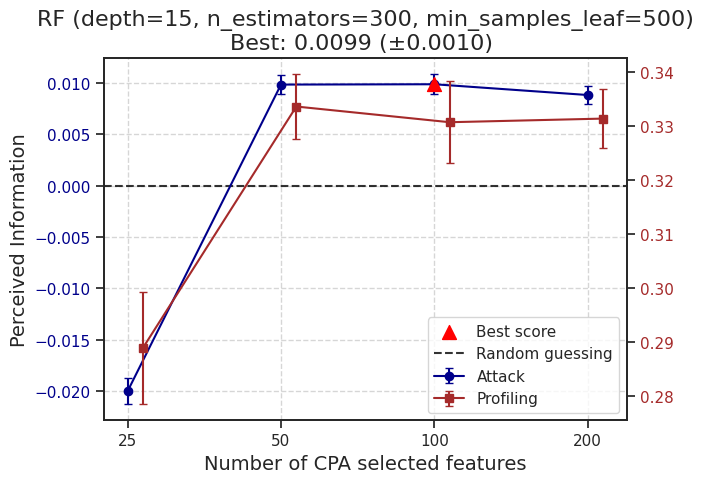

In [21]:
fig, ax = plt.subplots(figsize=(7, 5))
plots.plot_gs_results(
    'rf_cpa',
    "RF (depth=15, n_estimators=300, min_samples_leaf=500)",
    ax=ax, key='n_cpa', xlab='Number of CPA selected features',
)
plots.savetight(fig, '04_rf_cpa')

In [22]:
rho, _ = stats.pearsonr(X, util.hw(util.SBOX[ks ^ pts] ^ masks)[:, None])
idx = np.argsort(-rho)

rf = simplerf(SEED).fit(X, y)
feat_rank = np.argsort(-rf.feature_importances_)

# pl_clust = make_pipeline(
#     util.ClusterFeatures(threshold=0.02),
#     simplerf(SEED)
# ).fit(X, y)

In [3]:
clusterer = pl_clust.named_steps['clusterfeatures']
rf_clust = pl_clust.named_steps['randomforestclassifier']
feat_rank_clust = clusterer.repr_idx_[np.argsort(-rf_clust.feature_importances_)]

In [ ]:
clusters2 = [c for c in clusterer.cluster_indices_ if len(c) > 1]
clusters2

[[815, 816, 817, 818],
 [1315, 1316, 1317],
 [1066, 1067],
 [65, 66],
 [190, 191],
 [192, 193],
 [315, 316, 317],
 [440, 441],
 [559, 560],
 [808, 933],
 [1307, 1308],
 [1182, 1183],
 [1057, 1058],
 [182, 307],
 [432, 557, 558, 683]]

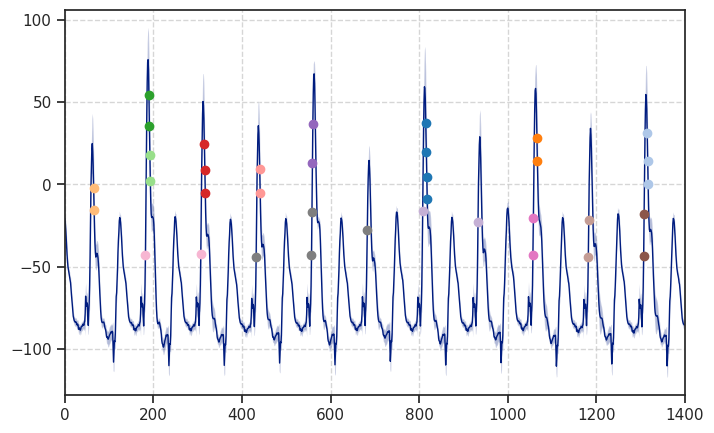

In [18]:
fig, ax = plots.plot_mean_std(X)
cmap = plt.get_cmap('tab20')
for i, cluster in enumerate(clusters2):
    ax.scatter(cluster, np.mean(X[:, cluster], axis=0), marker='o', zorder=3, color=cmap(i))

In [8]:
feat_not_clust = np.ones_like(feat_rank, dtype=bool)
feat_not_clust[feat_rank_clust] = False
feat_not_clust_idx = np.where(feat_not_clust)[0]

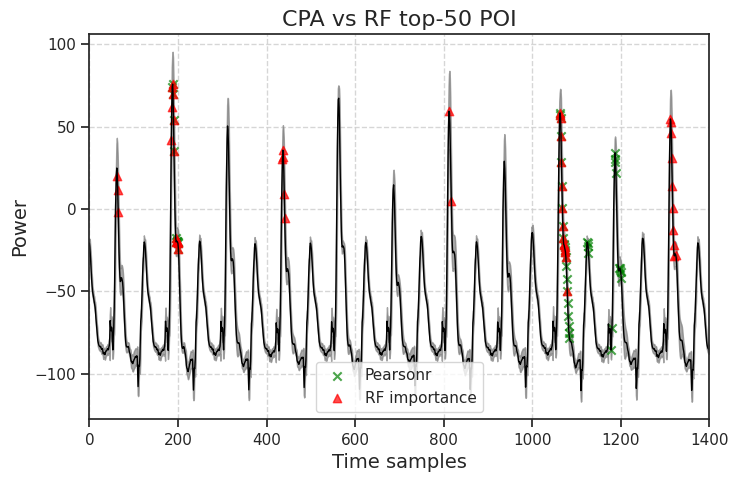

In [24]:
fig, ax = plots.plot_mean_std(X, figsize=(8, 5))

mean = X.mean(axis=0)
ax.scatter(idx[:50], mean[idx[:50]], color='green',
           marker='x', alpha=0.7, label='Pearsonr')
ax.scatter(feat_rank[:50], mean[feat_rank[:50]], color='red',
           marker='^', alpha=0.7, label='RF importance')
# ax.scatter(feat_rank_clust[:100], mean[feat_rank_clust[:100]], color='blue',
#            marker='o', alpha=0.7, label='RF importance (with clustering)')
# ax.scatter(feat_not_clust_idx[:100], mean[feat_not_clust_idx[:100]], color='purple',
#            marker='s', alpha=0.7, label='Removed features')
ax.legend(loc='lower center')

plots.labs(ax, "Time samples", "Power", "CPA vs RF top-50 POI")
plots.savetight(fig, "04_cpa_vs_rf_poi")